In [106]:
%reset -f 

import lark
from lark import Lark
from PIL import Image
from IPython.display import display

grammar = """
?start:     decl+
?decl:      vardecl
            | fundecl
?vardecl:   ("var" | type) ID "=" fexp ";"
?fundecl:   ID "(" [fargs] ")" [ ":" funret ] "{" vardecl* stmt+ "}"
?funret:    rettype | "(" [rettype "," ] rettype")"
?rettype:   type | "void"
?type:      "Int" 
            | "Bool"
            | "[" type "]"
?fargs:     [ fargs "," ] ID [ ":" type ]
?stmt:      "return" [fexp] ";"
?fexp:      exp 
?exp:       ID
            | INT
            | array
            | ("True" | "False")
            | fexp OP2 fexp
            | OP1 fexp

?array:     tuple | list
?tuple:     "(" [fexp ","]* fexp? ")"
?list:      "[" [fexp ","]* fexp? "]"

OP2:        "+" | "-" | "*" | "/" | "%"
            | "==" | "<" | ">" | "<=" | ">=" | "!="
            | "&&" | "||"

OP1:        "!" | "-"
INT:        /-?\\d+/
ID:         /[a-zA-Z_][a-zA-Z0-9_]*/


%ignore /\\s/ 
        | /\\/\\/.*/

"""

parser = Lark(grammar, parser='lalr')

def plot_prgm(prgm):
    tree = parser.parse(prgm)
    lark.tree.pydot__tree_to_png(tree, 'tree.png')
    display(Image.open('tree.png'))

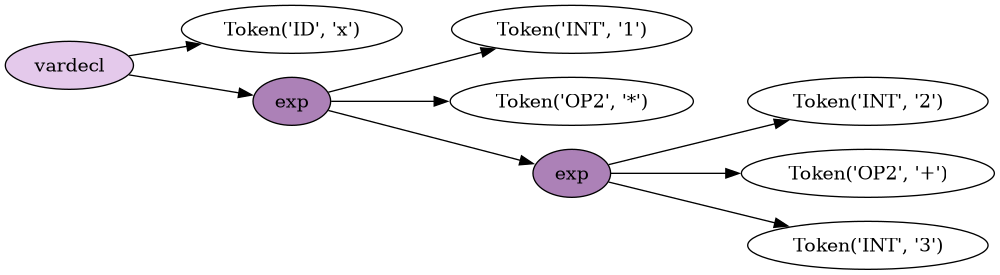

In [122]:
plot_prgm("var x = 1 * 2 + 3;")

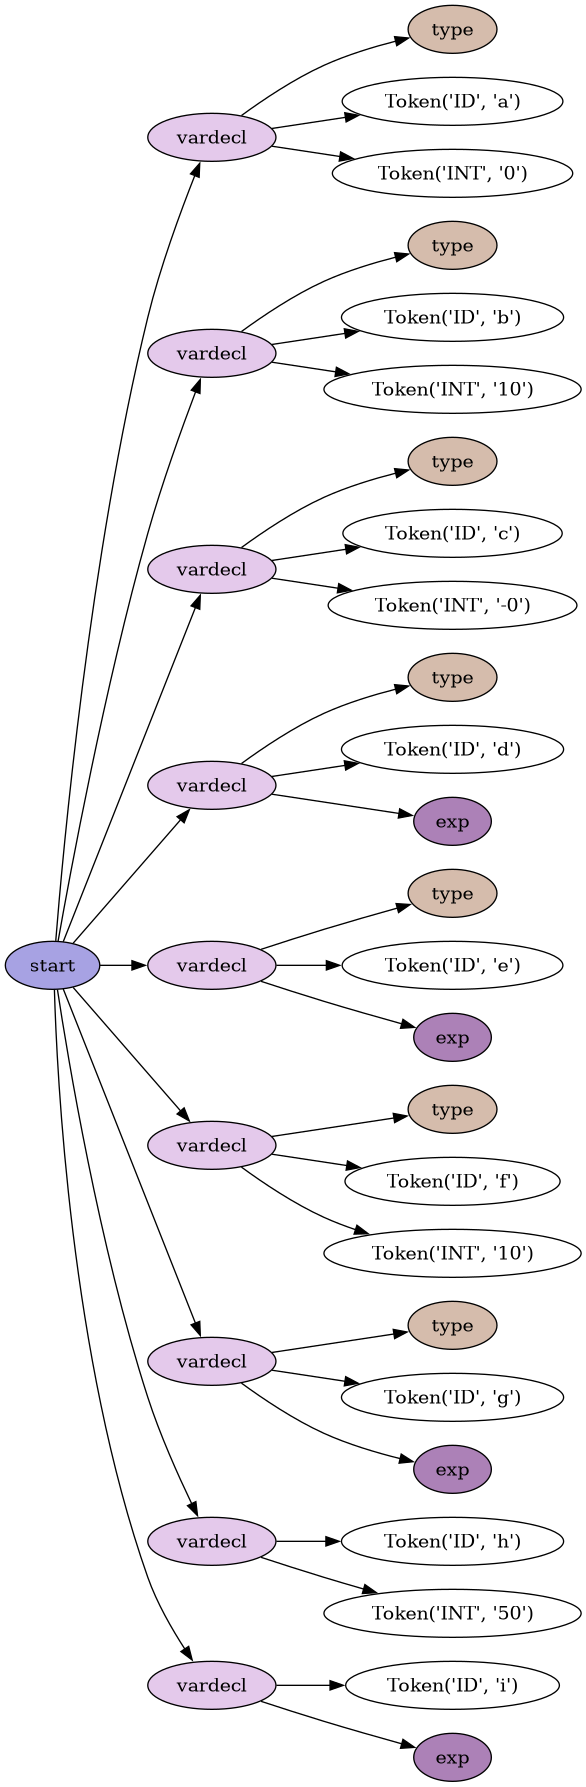

In [107]:
prgm = \
'''
// Constants of various types.
// Not all of them are type correct, but the parser should accept them.

Int a = 0;
Int b = 10;
Int c = -0;

Bool d = True;
Bool e = False;

Bool f = 10;
Int g = True;

var h = 50;
var i = True;
'''

plot_prgm(prgm)

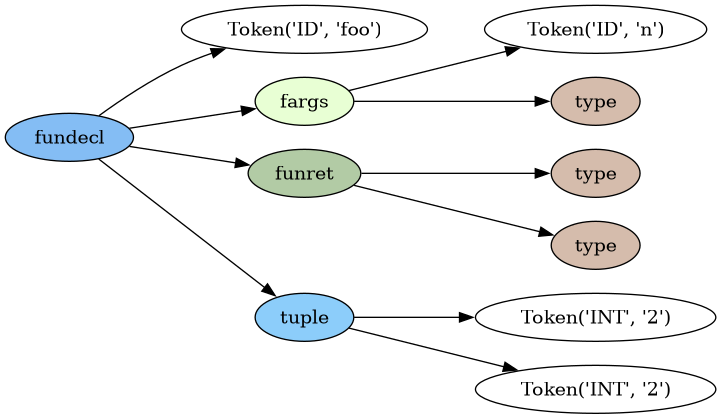

In [108]:
prgm = \
'''
foo (n : Int) : (Int, Int)
{
	return (2, 2);
}
'''

plot_prgm(prgm)

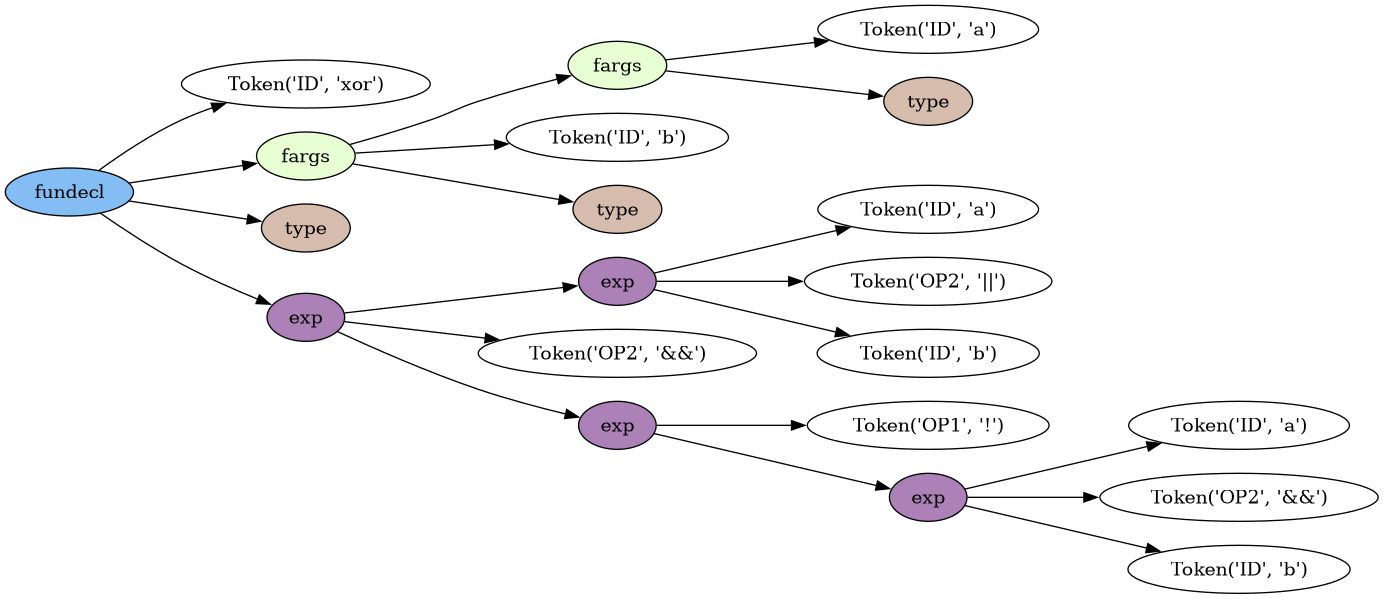

In [109]:
prgm = \
'''
xor(a : Bool, b : Bool) : Bool {
	return (a || b) && !(a && b);
}
'''

plot_prgm(prgm)

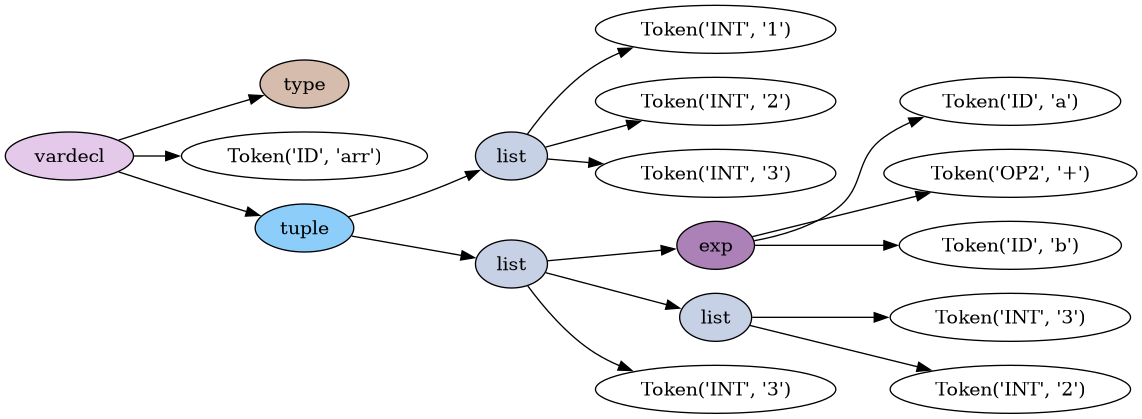

In [117]:
prgm = "[Int] arr = ([1, 2, 3], [(a + b), [3, 2], 3]);"
# prgm = "Bool x = True;"
plot_prgm(prgm)